Pandas For Financial Data

In [72]:
from scipy import stats
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import (WeekdayLocator, MONDAY)
import seaborn as sns
%matplotlib inline
from pandas_datareader import data, wb
style.use('ggplot')

In [10]:
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2014,12,31)

msft = data.DataReader('MSFT',"yahoo",start,end)
msft[:5]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,22.407425
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.934759
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,23.169132
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.529055
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,23.219353


In [11]:
msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,22.407425
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.934759
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,23.169132
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.529055
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,23.219353


In [14]:
def get(tickers,start,end):
    def dat(ticker):
        return data.DataReader(ticker,'yahoo',start,end)
    datas = map(dat,tickers)
    return pd.concat(datas, keys=tickers,names =['Ticker','Date'])

tickers = ['AAPL','MSFT','GE','TSLA','FB','NFLX','IBM','AA','DAL','UAL','PEP','KO']
all_data = get(tickers, start, end)
all_data.head()

High        Low       Open      Close      Volume  \
Ticker Date                                                                 
AAPL   2012-01-03  58.928570  58.428570  58.485714  58.747143  75555200.0   
       2012-01-04  59.240002  58.468571  58.571430  59.062859  65005500.0   
       2012-01-05  59.792858  58.952858  59.278572  59.718571  67817400.0   
       2012-01-06  60.392857  59.888573  59.967144  60.342857  79573200.0   
       2012-01-09  61.107143  60.192856  60.785713  60.247143  98506100.0   

                   Adj Close  
Ticker Date                   
AAPL   2012-01-03  39.172771  
       2012-01-04  39.383293  
       2012-01-05  39.820515  
       2012-01-06  40.236809  
       2012-01-09  40.172970

In [15]:
all_data.to_csv('/home/saazi/Documents/stocks_yahoo.csv')

In [16]:
sp_500 = data.DataReader("^GSPC", "yahoo", start, end)

In [20]:
sp_500.to_csv('/home/saazi/Documents/sp_500_yahoo.csv')

In [22]:
# reset the index to make everything columns
just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices[:5]

,Ticker,Date,Adj Close
0,AAPL,2012-01-03,39.172771
1,AAPL,2012-01-04,39.383293
2,AAPL,2012-01-05,39.820515
3,AAPL,2012-01-06,40.236809
4,AAPL,2012-01-09,40.172970


In [71]:
daily_close_px = just_closing_prices.pivot('Date','Ticker','Adj Close')
daily_close_px.head()

Ticker,AA,AAPL,DAL,FB,GE,IBM,KO,MSFT,NFLX,PEP,TSLA,UAL
Date,,,,,,,,,,,,
2012-01-03,20.893423,39.172771,7.386483,NaN,14.380466,146.470383,27.820843,22.407425,10.320000,54.080856,28.080000,18.900000
2012-01-04,21.391426,39.383293,7.358922,NaN,14.537114,145.872879,27.646315,22.934759,11.492857,54.357780,27.709999,18.520000
2012-01-05,21.187698,39.820515,7.652909,NaN,14.529281,145.181015,27.515425,23.169132,11.328571,53.934254,27.120001,18.389999
2012-01-06,20.734968,40.236809,7.643724,NaN,14.607606,143.514221,27.340904,23.529055,12.327143,53.258232,26.910000,18.209999
2012-01-09,21.346159,40.172970,7.606975,NaN,14.772087,142.767349,27.340904,23.219353,14.025714,53.535160,27.250000,17.930000


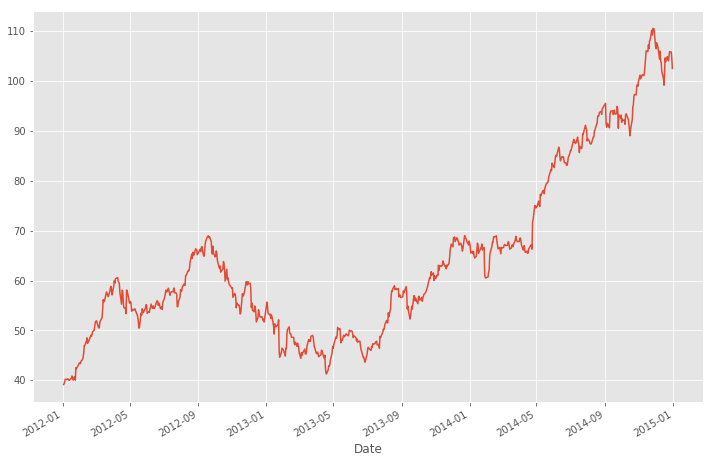

In [25]:
daily_close_px['AAPL'].plot(figsize=(12,8))
plt.show()

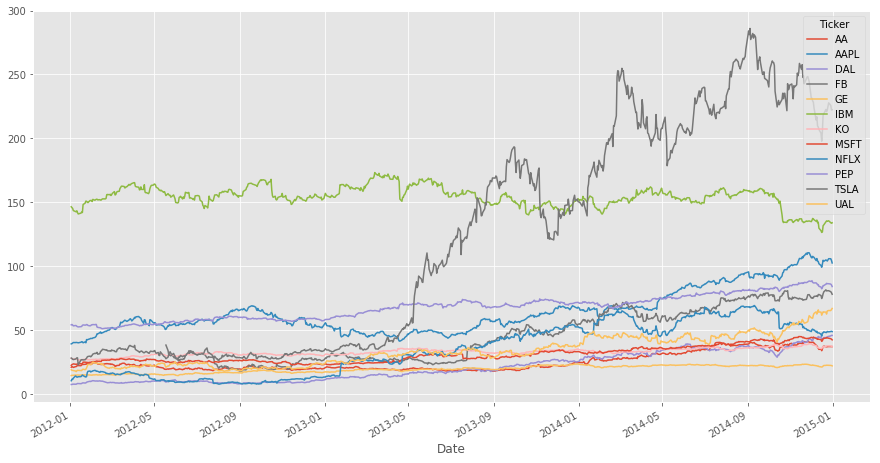

In [29]:
daily_close_px.plot(figsize=(15,8))
plt.show()

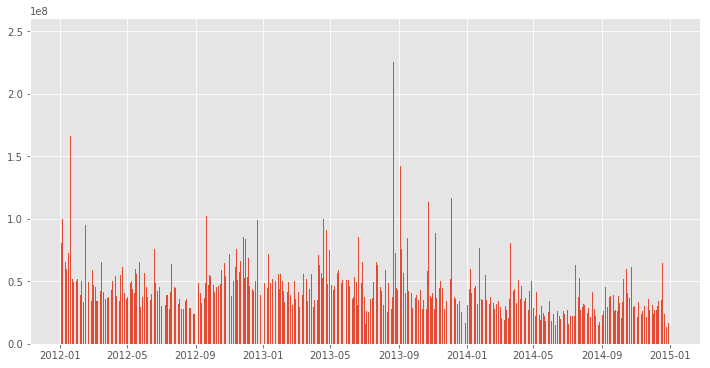

In [33]:
msftV = all_data.Volume.loc['MSFT']
plt.bar(msftV.index, msftV)
plt.gcf().set_size_inches(12,6)
plt.show()

Combined price and volumes

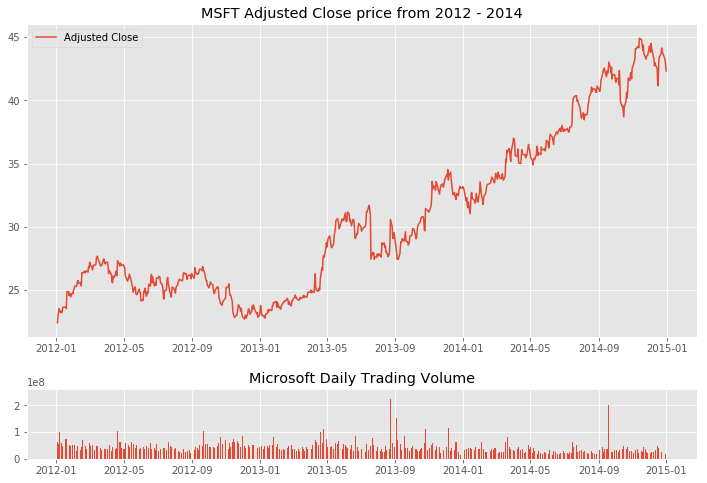

In [34]:
top = plt.subplot2grid((4,4),(0,0), rowspan = 3, colspan=4)
top.plot(daily_close_px.index,daily_close_px['MSFT'],label='Adjusted Close')
plt.title('MSFT Adjusted Close price from 2012 - 2014')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

In [35]:
subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'].reset_index()
subset.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-01,48.779999,47.709999,47.880001,48.619999,31191600.0,44.294411
1,2014-12-02,49.049999,48.200001,48.840000,48.459999,25773500.0,44.148651
2,2014-12-03,48.500000,47.810001,48.439999,48.080002,23534800.0,43.802464
3,2014-12-04,49.060001,48.200001,48.389999,48.840000,30320400.0,44.494839
4,2014-12-05,48.970001,48.380001,48.820000,48.419998,27313400.0,44.112209


In [36]:

subset['date_num'] = subset['Date'] \
.apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset[:5]

,Date,High,Low,Open,Close,Volume,Adj Close,date_num
0,2014-12-01,48.779999,47.709999,47.880001,48.619999,31191600.0,44.294411,735568.0
1,2014-12-02,49.049999,48.200001,48.840000,48.459999,25773500.0,44.148651,735569.0
2,2014-12-03,48.500000,47.810001,48.439999,48.080002,23534800.0,43.802464,735570.0
3,2014-12-04,49.060001,48.200001,48.389999,48.840000,30320400.0,44.494839,735571.0
4,2014-12-05,48.970001,48.380001,48.820000,48.419998,27313400.0,44.112209,735572.0


In [46]:
subset_as_tuples = [tuple(x) for x in subset[['date_num',
                                                'Open',
                                                'High',
                                                'Low',
                                                'Close']].values]

week_formatter = DateFormatter('%b %d') # e.g. Jan 12


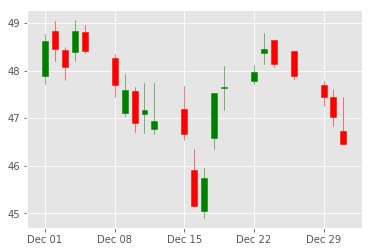

In [54]:
mondays = WeekdayLocator(MONDAY)  # major ticks on the mondays
#plt.figure(figsize=(15,8))
fig,ax = plt.subplots()
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)
candlestick_ohlc(ax,subset_as_tuples,width=0.6,colorup='g',colordown='r')
plt.show()

In [52]:
""" Linear regression with SciPy """
stock_returns = [0.065, 0.0265, -0.0593, -0.001, 0.0346]

mkt_returns = [0.055, -0.09, -0.041, 0.045, 0.022]
beta, alpha, r_value, p_value, std_err = stats.linregress(stock_returns, mkt_returns)
beta, alpha

(0.5077431878770808, -0.008481900352462384)

In [55]:
daily_pct_change = daily_close_px.pct_change()

In [58]:
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.iloc[:5,0:8]

Ticker,AA,AAPL,DAL,FB,GE,IBM,KO,MSFT
Date,,,,,,,,
2012-01-03,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2012-01-04,0.023835,0.005374,-0.003731,0.0,0.010893,-0.004079,-0.006273,0.023534
2012-01-05,-0.009524,0.011102,0.039950,0.0,-0.000539,-0.004743,-0.004734,0.010219
2012-01-06,-0.021368,0.010454,-0.001200,0.0,0.005391,-0.011481,-0.006343,0.015535
2012-01-09,0.029476,-0.001587,-0.004808,0.0,0.011260,-0.005204,0.000000,-0.013163


In [62]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.iloc[:10,:5]

Ticker,AA,AAPL,DAL,FB,GE
Date,,,,,
2012-01-03,1.000000,1.000000,1.000000,1.0,1.000000
2012-01-04,1.023835,1.005374,0.996269,1.0,1.010893
2012-01-05,1.014085,1.016536,1.036069,1.0,1.010348
2012-01-06,0.992416,1.027163,1.034826,1.0,1.015795
2012-01-09,1.021669,1.025533,1.029851,1.0,1.027233
2012-01-10,1.022752,1.029205,1.028607,1.0,1.019607
2012-01-11,1.043337,1.027527,1.070895,1.0,1.028323
2012-01-12,1.075840,1.024706,1.103234,1.0,1.031046
2012-01-13,1.061755,1.020865,1.100747,1.0,1.026144


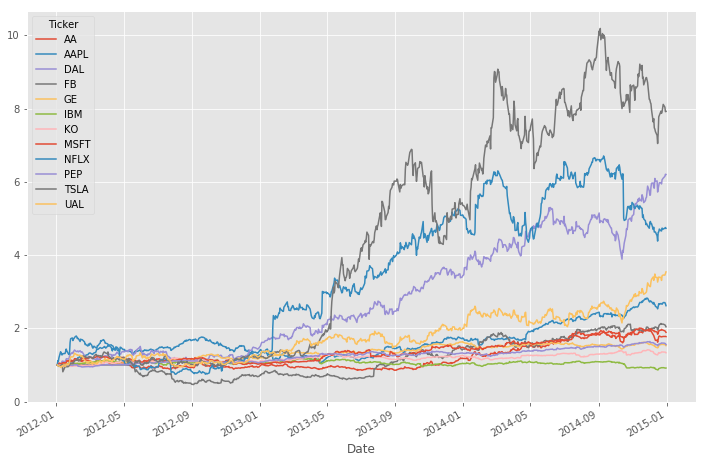

In [64]:
cum_daily_return.plot(figsize=(12,8))
#plt.legend(loc=2)
plt.show()

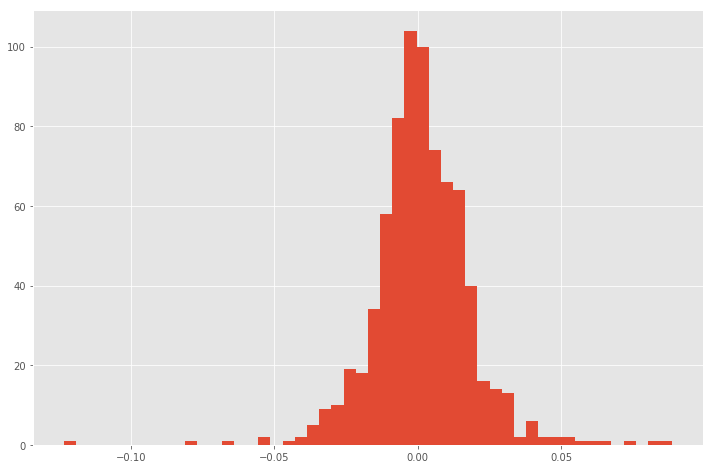

In [74]:
aapl = daily_pct_change['AAPL']
tsla = daily_pct_change['TSLA']
aapl.hist(bins=50, figsize=(12,8))
plt.show()

In [68]:
aapl.describe()
aapl.describe(percentiles=[0.025, 0.5, 0.975])

count    754.000000
mean       0.001425
std        0.017201
min       -0.123558
2.5%      -0.031592
50%        0.000898
97.5%      0.034680
max        0.088741
Name: AAPL, dtype: float64

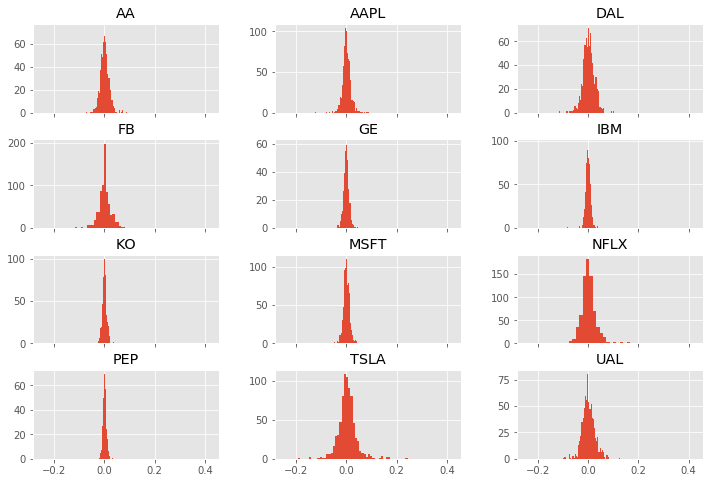

In [70]:
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))
plt.show()

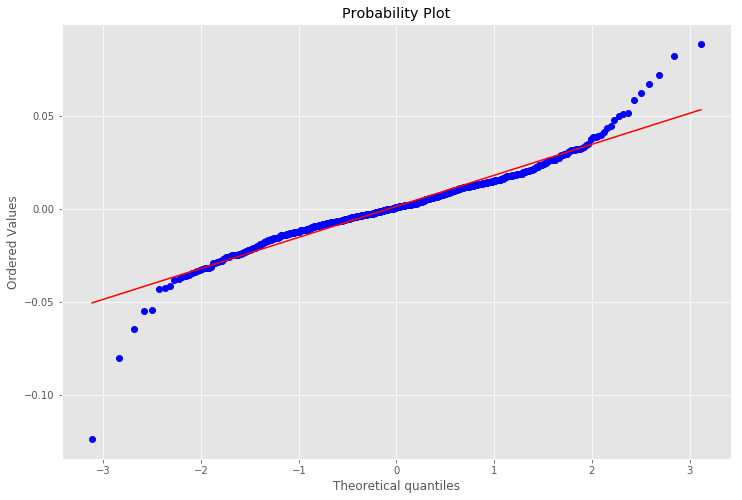

In [76]:
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.show()

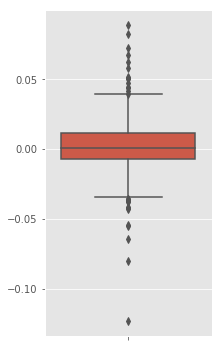

In [81]:
plt.figure(figsize=(3,6))
sns.boxplot(y=daily_pct_change[['AAPL']], data=daily_pct_change)
plt.show()
#daily_pct_change[['AAPL']].plot(kind='box', figsize=(3,6))

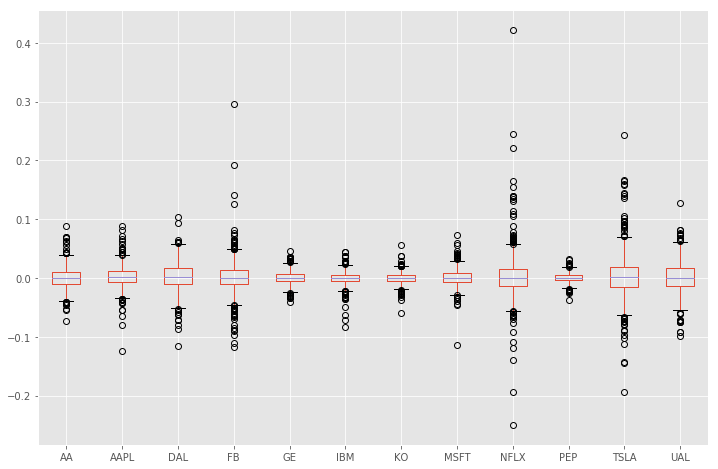

In [83]:
daily_pct_change.plot(kind='box', figsize=(12,8))
plt.show()

Scatter plots to show correlation between given pairs of stocks

In [90]:
# function to create the scatterplot
def render_scatter_plot(data, x_stock_name,y_stock_name,xlim=None,ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name],data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    
    ax.autoscale(False)
    ax.vlines(0 ,-10, 10)
    ax.hlines(0 ,-10, 10)
    ax.plot((-10,10), (-10, 10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)
    

Low correlation(0.2)

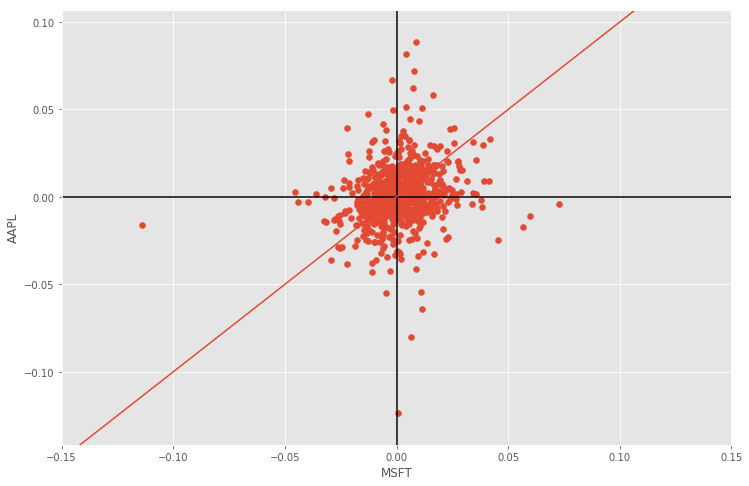

In [91]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change,'MSFT','AAPL',xlim = limits)

High correlation(0.76)

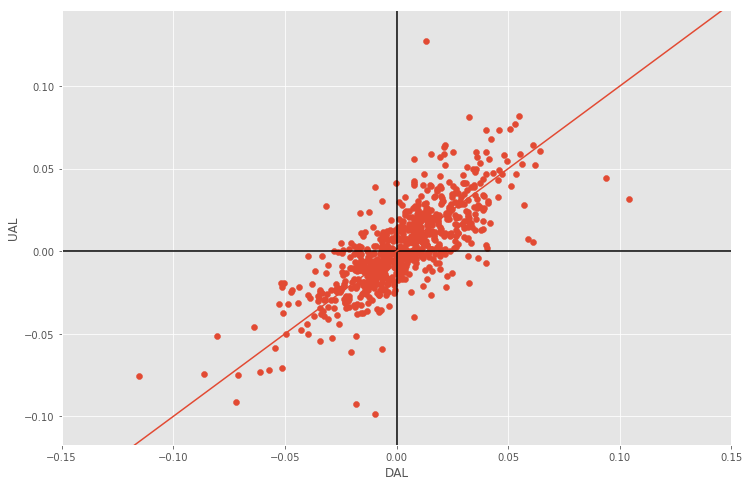

In [92]:
render_scatter_plot(daily_pct_change, 'DAL', 'UAL', xlim=limits)

correlation comparison for all stocks

/home/saazi/ml/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


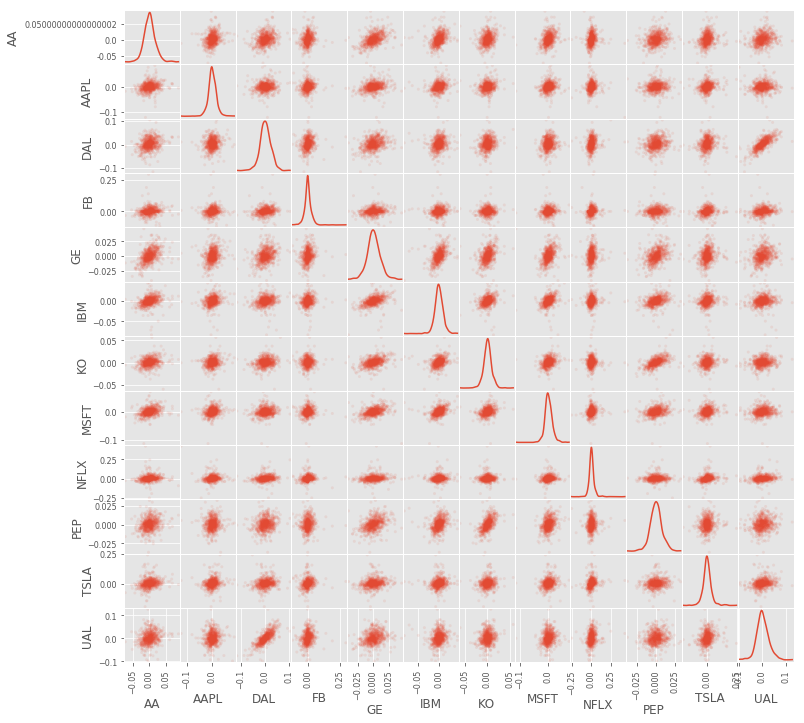

In [96]:
# all stocks against each other, with a KDE(kernel density estimation) graph in the diagonal
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,
figsize=(12,12))
plt.show()

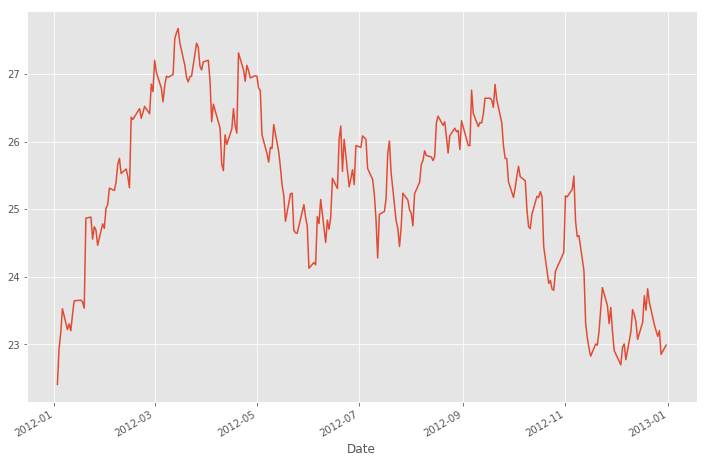

In [100]:
msftAC = msft['2012']['Adj Close']
msft.head()
sample = msftAC['2012']
sample.plot(figsize=(12,8))
plt.show()

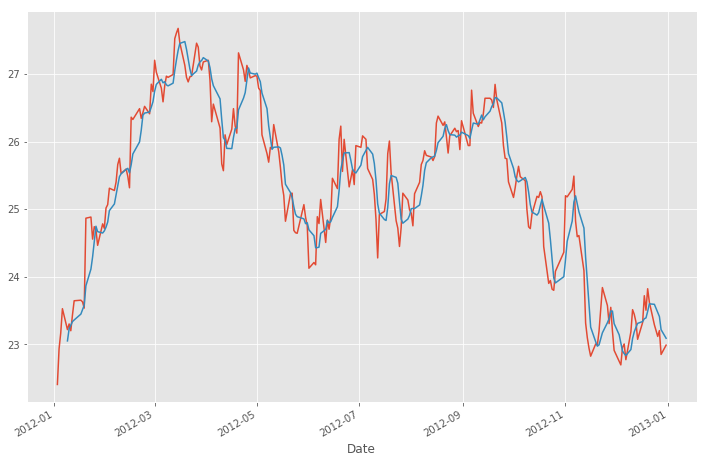

In [106]:
sample.plot(figsize=(12,8))
sample.rolling(window= 5).mean().plot(figsize=(12,8))
plt.show()